In [1]:
import pandas as pd
import numpy as np
from pandas import DataFrame,Series
import sklearn.feature_extraction
import sklearn.naive_bayes as nb
import sklearn.externals.joblib as jl
import jieba
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.feature_extraction.text import TfidfTransformer
import csv
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest
import matplotlib.pyplot as plt
from wordcloud import WordCloud,ImageColorGenerator,STOPWORDS
from PIL import Image
from sklearn import svm

In [1]:
df = pd.read_csv('D:\projectlist\logquery\\train_data',sep='\t',names=['label','query','city','query_count','is_off','max_category_rate','unique_poi_rate','is_filter'],encoding='gb18030')

NameError: name 'pd' is not defined

In [657]:
train1, test1 = train_test_split(df.ix[df['label'] ==1,:], train_size  = 500)
train2, test2 = train_test_split(df.ix[df['label'] ==2,:], train_size  = 500)
train3, test3 = train_test_split(df.ix[df['label'] ==3,:], train_size  = 500)
train = train1.append(train2).append(train3)
test = test1.append(test2).append(test3)

In [658]:
train_chi_X_tfidf = train.iloc[:,4:7].values
train_y = train['label'].values
test_X = test.iloc[:,4:7].values
test_y = test['label'].values

In [684]:
from sklearn.svm import LinearSVC
clf = LinearSVC(penalty="l2", dual=False,tol=1e-4)

In [685]:
clf.fit(train_chi_X_tfidf, train_y)

LinearSVC(C=1.0, class_weight=None, dual=False, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [686]:
clf.score(test_X,test_y)

0.8112189439734192

In [687]:
clf.predict(test_X)

array([2, 2, 1, ..., 3, 3, 3], dtype=int64)

In [690]:
sinle_test=df.ix[df['query']=='中关村移动',4:7].values
clf.predict(sinle_test)

array([3], dtype=int64)

In [689]:
train.ix[df['query']=='中国移动通信沟通100',4:7]

,is_off,max_category_rate,unique_poi_rate


In [683]:
test

,label,query,city,query_count,is_off,max_category_rate,unique_poi_rate,is_filter
13466,1,上海雷普电气有限公司,上海市,16,0,1.00,1.00,0
12985,1,腔调面,上海市,16,1,1.00,1.00,0
6269,1,园林机械,北京市,16,0,1.00,0.25,0
2463,1,世纪华联便利超市,北京市,16,1,1.00,1.00,0
3480,1,银行北京银行,北京市,43,0,1.00,1.00,0
1654,1,大鲁店德邦物流,北京市,16,1,0.90,1.00,0
13990,1,零距离网吧,广州市,16,0,1.00,1.00,0
3652,1,农业银行自助取款机,深圳市,24,0,1.00,0.80,0
3274,1,水晶主题酒店,北京市,16,1,0.55,1.00,0
9086,1,蔬菜大卖场,上海市,16,0,1.00,0.63,0


In [523]:
transformer =TfidfTransformer(norm=u'l2', use_idf=True, smooth_idf=True, sublinear_tf=False)
vectorizer=CountVectorizer()#该类会将文本中的词语转换为词频矩阵，矩阵元素a[i][j] 表示j词在i类文本下的词频  
sk = SelectKBest(chi2, k=5000)
transformer=TfidfTransformer()#该类会统计每个词语的tf-idf权值 
clf = svm.SVC()

In [524]:
train_X = vectorizer.fit_transform(train['res_data'].values)
train_y = train['label'].values
# train_chi_X = sk.fit_transform(train_X, train_y)
train_chi_X_tfidf=transformer.fit_transform(train_X)#第一个fit_transform是计算tf-idf，第二个fit_transform是将文本转为词频矩阵 
clf.fit(train_chi_X_tfidf, train_y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [528]:
test_X = vectorizer.fit_transform(test2['res_data'].values)
test_y = test2['label'].values
# test_chi_X = sk.fit_transform(test_X, test_y)
test_chi_X_tfidf=transformer.fit_transform(test_X)#第一个fit_transform是计算tf-idf，第二个fit_transform是将文本转为词频矩阵

In [1]:
sdf = { v:fs[i]  for i,v in enumerate(vectorizer.get_feature_names())}

NameError: name 'vectorizer' is not defined

In [560]:
fs = np.sum(train_X,axis=0).tolist()[0]

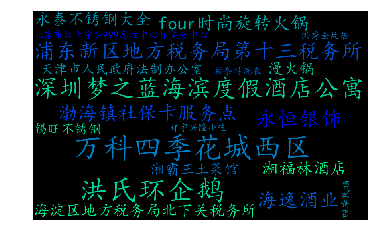

In [574]:
my_wordcloud = WordCloud(
            colormap='winter', 
            width=800,
            height=800,
            background_color='black',    # 设置背景颜色
            mask = abel_mask,        # 设置背景图片
            max_words = 20,            # 设置最大现实的字数
            stopwords = STOPWORDS,        # 设置停用词
            font_path = 'C:\Windows\Fonts\simkai.ttf',# 设置字体格式，如不设置显示不了中文
            max_font_size = 150,            # 设置字体最大值
            random_state = 10,            # 设置有多少种随机生成状态，即有多少种配色方案
                scale=0.5
                ).generate_from_frequencies(sdf)

# 根据图片生成词云颜色
image_colors = ImageColorGenerator(abel_mask)
# my_wordcloud.recolor(color_func=image_colors)

# 以下代码显示图片
plt.imshow(my_wordcloud)
plt.axis("off")
plt.show()

In [530]:
clf.predict(test_chi_X_tfidf)

ValueError: X.shape[1] = 12217 should be equal to 68133, the number of features at training time

In [519]:
test_y

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [517]:
clf.score(test_chi_X_tfidf,test_y)

0.0

In [217]:
corpus=["我 来到 北京 清华大学 清华大学",#第一类文本切词后的结果，词之间以空格隔开  
        "他 来到 了 网易 杭研 大厦",#第二类文本的切词结果  
        "小明 硕士 毕业 与 中国 科学院",#第三类文本的切词结果  
        "我 除此之外 爱 北京 天安门 "]

print(corpus)

['我 来到 北京 清华大学 清华大学', '他 来到 了 网易 杭研 大厦', '小明 硕士 毕业 与 中国 科学院', '我 除此之外 爱 北京 天安门 ']


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [476]:
transformer =TfidfTransformer(norm=u'l2', use_idf=True, smooth_idf=True, sublinear_tf=False)
vectorizer=CountVectorizer()#该类会将文本中的词语转换为词频矩阵，矩阵元素a[i][j] 表示j词在i类文本下的词频  
test_X = vectorizer.fit_transform(test['res_data'].values)
test_y = test['label'].values
sk = SelectKBest(chi2, k=5000)
test_chi_X = sk.fit_transform(test_X, test_y)

transformer=TfidfTransformer()#该类会统计每个词语的tf-idf权值  
test_chi_X_tfidf=transformer.fit_transform(test_chi_X)#第一个fit_transform是计算tf-idf，第二个fit_transform是将文本转为词频矩阵

In [477]:
clf.predict(test_chi_X_tfidf)

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [479]:
clf.score(test_chi_X_tfidf,test_y)

0.89831844456121912

In [456]:
fn_dict = { v:k for k,v in enumerate(vectorizer.get_feature_names())}

In [464]:
fn_dict['超市发']

51732

In [414]:
tfidf=transformer.fit_transform(X_new)#第一个fit_transform是计算tf-idf，第二个fit_transform是将文本转为词频矩阵

In [415]:
tfidf.toarray()

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [406]:
abel_mask = np.array(Image.open("D:\\projectlist\\logquery\\12320927_1342153351898.jpg"))
words = ' '.join(df['res_data'].values)

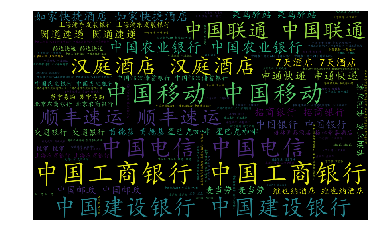

In [411]:
my_wordcloud = WordCloud(
            width=800,
            height=800,
            background_color='black',    # 设置背景颜色
            mask = abel_mask,        # 设置背景图片
            max_words = 100,            # 设置最大现实的字数
            stopwords = STOPWORDS,        # 设置停用词
            font_path = 'C:\Windows\Fonts\simkai.ttf',# 设置字体格式，如不设置显示不了中文
            max_font_size = 150,            # 设置字体最大值
            random_state = 100,            # 设置有多少种随机生成状态，即有多少种配色方案
                scale=0.5
                ).generate(words)

# 根据图片生成词云颜色
image_colors = ImageColorGenerator(abel_mask)
# my_wordcloud.recolor(color_func=image_colors)

# 以下代码显示图片
plt.imshow(my_wordcloud)
plt.axis("off")
plt.show()

In [34]:
jieba.set_dictionary('D:\word\dict\\words.freq.new')

In [35]:
def cut_line(test_term):
    seg_list = jieba.cut(test_term, cut_all=False)
    return " ".join(seg_list)

In [43]:
df['data']=df['data'].apply(func=cut_line)

In [59]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer

In [66]:
tfidf =TfidfTransformer(norm=u'l2', use_idf=True, smooth_idf=True, sublinear_tf=False)
vectorizer=CountVectorizer()#该类会将文本中的词语转换为词频矩阵，矩阵元素a[i][j] 表示j词在i类文本下的词频  
transformer=TfidfTransformer()#该类会统计每个词语的tf-idf权值  
tfidf=transformer.fit_transform(vectorizer.fit_transform(df['data'].values))#第一个fit_transform是计算tf-idf，第二个fit_transform是将文本转为词频矩阵

In [67]:
word=vectorizer.get_feature_names()#获取词袋模型中的所有词语

In [115]:
import csv

In [116]:
stop_word = pd.read_csv('D:\\pythonwork\\query-analyze\\docs\\stopWords',encoding='gb18030',quoting=csv.QUOTE_NONE,names=['stop_word'])

In [134]:
sw = stop_word['stop_word'].values.tolist()

In [293]:
vectorizer=CountVectorizer(analyzer='word',stop_words=sw)#该类会将文本中的词语转换为词频矩阵，矩阵元素a[i][j] 表示j词在i类文本下的词频  


X = vectorizer.fit_transform(df['data'].values)

In [294]:
X.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [295]:
transformer=TfidfTransformer(norm='l2', use_idf=True, smooth_idf=True, sublinear_tf=False)#该类会统计每个词语的tf-idf权值  
tfidf=transformer.fit_transform(X)#第一个fit_transform是计算tf-idf，第二个fit_transform是将文本转为词频矩阵

In [299]:
y = df['label'].values

In [300]:
y

array([1, 1, 1, ..., 2, 2, 2], dtype=int64)

In [311]:
skb = SelectKBest(chi2, k=10000)

In [328]:
X_new = skb.fit_transform(X, y)

In [329]:
X_new

<19028x10000 sparse matrix of type '<class 'numpy.int64'>'
	with 155753 stored elements in Compressed Sparse Row format>

In [313]:
X_new.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [280]:
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest

In [281]:
from sklearn.datasets import load_iris

In [323]:
iris = load_iris()
X1, y1 = iris.data, iris.target

In [324]:
y1

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [284]:
X_new = SelectKBest(chi2, k=2).fit_transform(X, y)

In [330]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud,ImageColorGenerator,STOPWORDS

In [332]:
from PIL import Image

In [333]:
abel_mask = np.array(Image.open("D:\\structure\\query\\12320927_1342153351898.jpg"))

In [352]:
words = ' '.join(df['data'].values)

In [ ]:
plt.fg

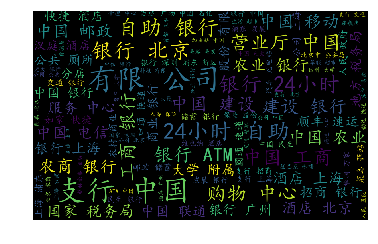

In [355]:
my_wordcloud = WordCloud(
            background_color='black',    # 设置背景颜色
            mask = abel_mask,        # 设置背景图片
            max_words = 100,            # 设置最大现实的字数
            stopwords = STOPWORDS,        # 设置停用词
            font_path = 'C:\Windows\Fonts\simkai.ttf',# 设置字体格式，如不设置显示不了中文
            max_font_size = 150,            # 设置字体最大值
            random_state = 50,            # 设置有多少种随机生成状态，即有多少种配色方案
                scale=.5
                ).generate(words)

# 根据图片生成词云颜色
image_colors = ImageColorGenerator(abel_mask)
#my_wordcloud.recolor(color_func=image_colors)

# 以下代码显示图片
plt.imshow(my_wordcloud)
plt.axis("off")
plt.show()